In [23]:
import pandas as pd

training = pd.read_parquet("training.parquet")
validation = pd.read_parquet("validation.parquet")

In [24]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                7000 non-null   object
 1   query                7000 non-null   object
 2   question             7000 non-null   object
 3   query_toks           7000 non-null   object
 4   query_toks_no_value  7000 non-null   object
 5   question_toks        7000 non-null   object
dtypes: object(6)
memory usage: 328.2+ KB


In [25]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                1034 non-null   object
 1   query                1034 non-null   object
 2   question             1034 non-null   object
 3   query_toks           1034 non-null   object
 4   query_toks_no_value  1034 non-null   object
 5   question_toks        1034 non-null   object
dtypes: object(6)
memory usage: 48.6+ KB


In [26]:
total_dataset = pd.concat([training, validation], ignore_index=True)
total_dataset

,db_id,query,question,query_toks,query_toks_no_value,question_toks
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","[List, the, name, ,, born, state, and, age, of..."
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...,"[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...","[What, is, the, average, number, of, employees..."
...,...,...,...,...,...,...
8029,singer,SELECT Citizenship FROM singer WHERE Birth_Yea...,What are the citizenships that are shared by s...,"[SELECT, Citizenship, FROM, singer, WHERE, Bir...","[select, citizenship, from, singer, where, bir...","[What, are, the, citizenships, that, are, shar..."
8030,real_estate_properties,SELECT count(*) FROM Other_Available_Features,How many available features are there in total?,"[SELECT, count, (, *, ), FROM, Other_Available...","[select, count, (, *, ), from, other_available...","[How, many, available, features, are, there, i..."
8031,real_estate_properties,SELECT T2.feature_type_name FROM Other_Availab...,What is the feature type name of feature AirCon?,"[SELECT, T2.feature_type_name, FROM, Other_Ava...","[select, t2, ., feature_type_name, from, other...","[What, is, the, feature, type, name, of, featu..."
8032,real_estate_properties,SELECT T2.property_type_description FROM Prope...,Show the property type descriptions of propert...,"[SELECT, T2.property_type_description, FROM, P...","[select, t2, ., property_type_description, fro...","[Show, the, property, type, descriptions, of, ..."


In [27]:
SQL_CLAUSES = ["HAVING", "ORDER BY", "GROUP BY", "JOIN", "SELECT"]

# Function to count occurrences of each SQL clause separately and add them as individual columns
def add_sql_clause_counts(df, clauses):
    for clause in clauses:
        # Count the occurrence of each clause in each query
        df[clause] = df['query'].apply(lambda x: x.upper().count(clause))
    return df

# Apply the function to the DataFrame
df_with_counts = add_sql_clause_counts(total_dataset, SQL_CLAUSES)
df_with_counts.head()

,db_id,query,question,query_toks,query_toks_no_value,question_toks,HAVING,ORDER BY,GROUP BY,JOIN,SELECT
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ...",0,0,0,0,1
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","[List, the, name, ,, born, state, and, age, of...",0,1,0,0,1
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg...",0,0,0,0,1
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...,"[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget...",0,0,0,0,1
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...","[What, is, the, average, number, of, employees...",0,0,0,0,1


In [37]:
df_with_counts.to_csv("spider.csv")

In [29]:
df_with_counts

,db_id,query,question,query_toks,query_toks_no_value,question_toks,HAVING,ORDER BY,GROUP BY,JOIN,SELECT
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...","[How, many, heads, of, the, departments, are, ...",0,0,0,0,1
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","[List, the, name, ,, born, state, and, age, of...",0,1,0,0,1
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg...",0,0,0,0,1
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...,"[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget...",0,0,0,0,1
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...","[What, is, the, average, number, of, employees...",0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8029,singer,SELECT Citizenship FROM singer WHERE Birth_Yea...,What are the citizenships that are shared by s...,"[SELECT, Citizenship, FROM, singer, WHERE, Bir...","[select, citizenship, from, singer, where, bir...","[What, are, the, citizenships, that, are, shar...",0,0,0,0,2
8030,real_estate_properties,SELECT count(*) FROM Other_Available_Features,How many available features are there in total?,"[SELECT, count, (, *, ), FROM, Other_Available...","[select, count, (, *, ), from, other_available...","[How, many, available, features, are, there, i...",0,0,0,0,1
8031,real_estate_properties,SELECT T2.feature_type_name FROM Other_Availab...,What is the feature type name of feature AirCon?,"[SELECT, T2.feature_type_name, FROM, Other_Ava...","[select, t2, ., feature_type_name, from, other...","[What, is, the, feature, type, name, of, featu...",0,0,0,1,1
8032,real_estate_properties,SELECT T2.property_type_description FROM Prope...,Show the property type descriptions of propert...,"[SELECT, T2.property_type_description, FROM, P...","[select, t2, ., property_type_description, fro...","[Show, the, property, type, descriptions, of, ...",0,0,1,1,1


In [30]:
check = df_with_counts[['HAVING', 'ORDER BY', 'GROUP BY', 'JOIN', 'SELECT']]
check

,HAVING,ORDER BY,GROUP BY,JOIN,SELECT
0,0,0,0,0,1
1,0,1,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
8029,0,0,0,0,2
8030,0,0,0,0,1
8031,0,0,0,1,1
8032,0,0,1,1,1


<Axes: >

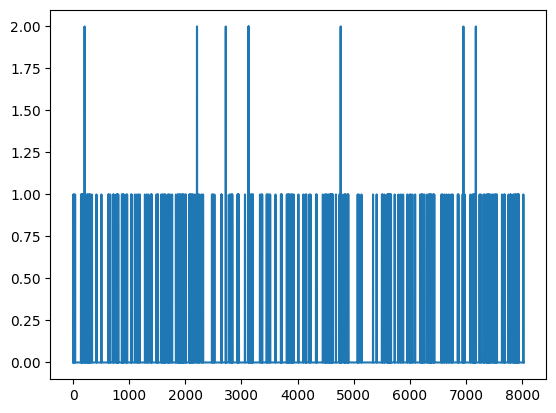

In [31]:
df_with_counts['HAVING'].plot()

<Axes: >

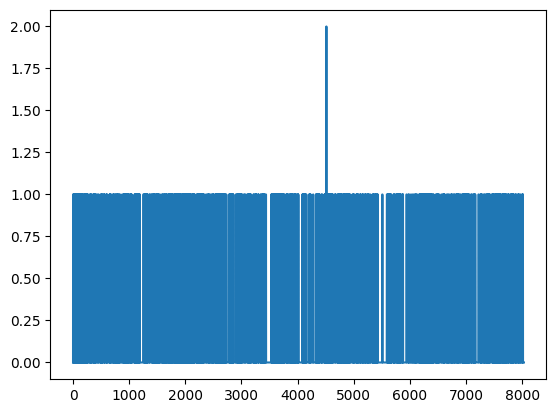

In [32]:
df_with_counts['ORDER BY'].plot()

<Axes: >

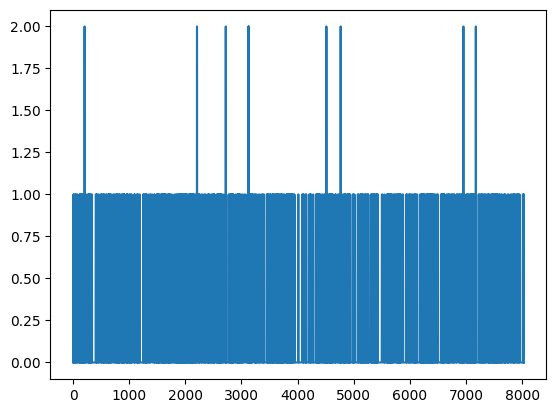

In [33]:
df_with_counts['GROUP BY'].plot()

<Axes: >

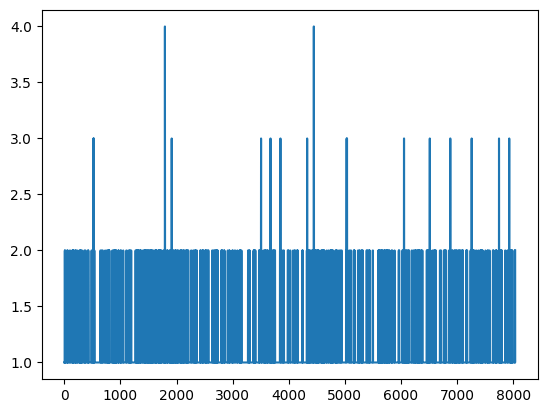

In [34]:
df_with_counts['SELECT'].plot()

In [40]:
df_with_counts['JOIN'].argmax()

3293

In [44]:
df_with_counts.iloc[3293,:][1]

/var/folders/__/4fkccwzn4898x6sm4zh8dkth0000gn/T/ipykernel_9190/2235172002.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_with_counts.iloc[3293,:][1]


"SELECT T1.stu_fname FROM student AS T1 JOIN enroll AS T2 ON T1.stu_num  =  T2.stu_num JOIN CLASS AS T3 ON T2.class_code  =  T3.class_code JOIN course AS T4 ON T3.crs_code  =  T4.crs_code JOIN department AS T5 ON T5.dept_code  =  T4.dept_code WHERE T5.dept_name  =  'Accounting' INTERSECT SELECT T1.stu_fname FROM student AS T1 JOIN enroll AS T2 ON T1.stu_num  =  T2.stu_num JOIN CLASS AS T3 ON T2.class_code  =  T3.class_code JOIN course AS T4 ON T3.crs_code  =  T4.crs_code JOIN department AS T5 ON T5.dept_code  =  T4.dept_code WHERE T5.dept_name  =  'Computer Info. Systems'"

In [16]:
8034/5

1606.8